# Import libraries

In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Functions

In [35]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

In [36]:

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'dataset/df_ecom_profiling.csv'

file_tag = 'df_ecom_profiling'

# Load

In [71]:
test_data = False
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)


df.head(10)

,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,view,NaN,26.26,apparel,underwear,NaN,not_purchase,4,weekday,Thursday,23,10,28,morning
1,view,xiaomi,386.08,appliances,personal,massager,not_purchase,5,weekday,Thursday,30,6,43,morning
2,view,ariston,123.53,electronics,clocks,NaN,not_purchase,3,weekday,Friday,17,16,7,afternoon
3,view,kawai,1437.53,apparel,underwear,NaN,not_purchase,4,weekday,Thursday,23,11,34,morning
4,view,defacto,17.99,apparel,shoes,keds,not_purchase,3,weekday,Tuesday,21,4,25,night
5,cart,samsung,195.87,construction,tools,light,not_purchase,1,weekday,Thursday,2,11,46,morning
6,view,asus,385.57,electronics,audio,headphone,not_purchase,4,weekday,Thursday,23,14,26,afternoon
7,view,galaxy,48.73,appliances,kitchen,oven,not_purchase,3,weekday,Thursday,16,13,8,afternoon
8,view,vivo,141.55,construction,tools,light,not_purchase,3,weekday,Wednesday,15,12,18,afternoon
9,view,redmond,21.85,sport,bicycle,NaN,not_purchase,4,weekday,Tuesday,28,8,18,morning


In [72]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
event_type                 3
brand                   2044
price                  13363
category_code_lvl_1       13
category_code_lvl_2       58
category_code_lvl_3       84
conversion                 2
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                3
dtype: int64


In [38]:
df.shape[0]

69884

## Split data between train and test dataset
- split 70/30 and use the most recent records to the test data

In [66]:

df_sorted = df.sort_values(by='event_time', ascending=True).reset_index(drop=True)
df_sorted.head()

,event_time,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,2020-04-01 00:01:11+00:00,view,imperial,168.55,computers,peripherals,printer,not_purchase,1,weekday,Wednesday,1,0,1,night
1,2020-04-01 00:07:16+00:00,view,NaN,323.30,NaN,NaN,NaN,not_purchase,1,weekday,Wednesday,1,0,7,night
2,2020-04-01 00:17:36+00:00,view,karcher,241.94,sport,trainer,NaN,not_purchase,1,weekday,Wednesday,1,0,17,night
3,2020-04-01 00:18:11+00:00,view,hp,990.76,electronics,audio,headphone,not_purchase,1,weekday,Wednesday,1,0,18,night
4,2020-04-01 00:21:48+00:00,view,oladi,19.31,apparel,shoes,NaN,not_purchase,1,weekday,Wednesday,1,0,21,night


In [67]:
df.shape[0]
df_sorted.shape[0]


69884

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the split point: calculate the index for 70% of the data
split_index = int(len(df_sorted) * 0.7)

# Create the training set with the first 70% of the data
train_df = df_sorted.iloc[:split_index]

# Create the testing set with the last 30% of the data (the most recent data)
test_df = df_sorted.iloc[split_index:]

# Check the dimensions of the training and testing sets
print(f'Train set size: {train_df.shape[0]}')
print(f'Test set size: {test_df.shape[0]}')

# Display the first 20 rows of the training and testing sets
print("Training set:")
print(train_df.head(20))

print("\nTesting set:")
print(test_df.head(20))

Train set size: 48918
Test set size: 20966
Training set:
                  event_time event_type     brand    price  \
0  2020-04-01 00:01:11+00:00       view  imperial   168.55   
1  2020-04-01 00:07:16+00:00       view       NaN   323.30   
2  2020-04-01 00:17:36+00:00       view   karcher   241.94   
3  2020-04-01 00:18:11+00:00       view        hp   990.76   
4  2020-04-01 00:21:48+00:00       view     oladi    19.31   
5  2020-04-01 00:27:05+00:00       view       NaN   766.78   
6  2020-04-01 00:39:10+00:00       view  dauscher  1090.63   
7  2020-04-01 00:40:01+00:00       view     vitek    30.86   
8  2020-04-01 00:45:59+00:00       view     vitek   141.55   
9  2020-04-01 00:48:01+00:00       view       NaN    25.61   
10 2020-04-01 00:48:44+00:00       view    troyka    12.84   
11 2020-04-01 00:51:15+00:00       view   samsung   393.32   
12 2020-04-01 00:58:09+00:00       view   tp-link    76.42   
13 2020-04-01 01:09:53+00:00       view     intel   774.08   
14 2020-04-01

### Train data

In [54]:
train_df.head(20)

,event_time,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,2020-04-01 00:01:11+00:00,view,imperial,168.55,computers,peripherals,printer,not_purchase,1,weekday,Wednesday,1,0,1,night
1,2020-04-01 00:07:16+00:00,view,NaN,323.30,NaN,NaN,NaN,not_purchase,1,weekday,Wednesday,1,0,7,night
2,2020-04-01 00:17:36+00:00,view,karcher,241.94,sport,trainer,NaN,not_purchase,1,weekday,Wednesday,1,0,17,night
3,2020-04-01 00:18:11+00:00,view,hp,990.76,electronics,audio,headphone,not_purchase,1,weekday,Wednesday,1,0,18,night
4,2020-04-01 00:21:48+00:00,view,oladi,19.31,apparel,shoes,NaN,not_purchase,1,weekday,Wednesday,1,0,21,night
5,2020-04-01 00:27:05+00:00,view,NaN,766.78,apparel,shoes,moccasins,not_purchase,1,weekday,Wednesday,1,0,27,night
6,2020-04-01 00:39:10+00:00,view,dauscher,1090.63,appliances,kitchen,refrigerators,not_purchase,1,weekday,Wednesday,1,0,39,night
7,2020-04-01 00:40:01+00:00,view,vitek,30.86,NaN,NaN,NaN,not_purchase,1,weekday,Wednesday,1,0,40,night
8,2020-04-01 00:45:59+00:00,view,vitek,141.55,appliances,environment,vacuum,not_purchase,1,weekday,Wednesday,1,0,45,night
9,2020-04-01 00:48:01+00:00,view,NaN,25.61,furniture,universal,light,not_purchase,1,weekday,Wednesday,1,0,48,night


### Test data

In [55]:
test_df.head(20)

,event_time,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
48918,2020-04-23 13:22:48+00:00,view,erlit,357.57,NaN,NaN,NaN,not_purchase,4,weekday,Thursday,23,13,22,afternoon
48919,2020-04-23 13:23:27+00:00,view,axis,244.54,appliances,kitchen,toster,not_purchase,4,weekday,Thursday,23,13,23,afternoon
48920,2020-04-23 13:23:48+00:00,cart,philips,56.60,appliances,personal,hair_cutter,not_purchase,4,weekday,Thursday,23,13,23,afternoon
48921,2020-04-23 13:24:48+00:00,view,mattel,32.66,appliances,kitchen,grill,not_purchase,4,weekday,Thursday,23,13,24,afternoon
48922,2020-04-23 13:25:59+00:00,view,sencor,168.83,appliances,kitchen,mixer,not_purchase,4,weekday,Thursday,23,13,25,afternoon
48923,2020-04-23 13:26:08+00:00,view,xiaomi,317.90,construction,tools,light,not_purchase,4,weekday,Thursday,23,13,26,afternoon
48924,2020-04-23 13:26:20+00:00,view,hotpoint-ariston,344.90,appliances,kitchen,hob,not_purchase,4,weekday,Thursday,23,13,26,afternoon
48925,2020-04-23 13:26:35+00:00,view,lg,81.83,furniture,bedroom,blanket,not_purchase,4,weekday,Thursday,23,13,26,afternoon
48926,2020-04-23 13:27:35+00:00,view,adidas,63.30,apparel,shoes,keds,not_purchase,4,weekday,Thursday,23,13,27,afternoon
48927,2020-04-23 13:29:48+00:00,view,samsung,1016.99,construction,tools,light,not_purchase,4,weekday,Thursday,23,13,29,afternoon


In [57]:
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN


def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "conversion"
file_tag = "conversion"
train: DataFrame = train_df
test: DataFrame = test_df

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"images/{file_tag}_eval.png")
show()

ValueError: Unknown label type: (array([0.00000e+00, 4.60000e-01, 4.70000e-01, ..., 2.57399e+03,
       2.57404e+03, 2.57407e+03]),)

<Figure size 640x480 with 0 Axes>

## Data Preparation
- Goal is to improve the quality of the data

#### List of distinct values for each variable

In [73]:
for v in vars["symbolic"]:
    print(v, df[v].unique())

brand [nan 'xiaomi' 'ariston' ... 'lunecase' 'babylock' 'redblu']
category_code_lvl_2 ['underwear' 'personal' 'clocks' 'shoes' 'tools' 'audio' 'kitchen'
 'bicycle' nan 'shorts' 'costume' 'components' 'tennis' 'trousers' 'ski'
 'accessories' 'umbrella' 'tablet' 'bathroom' 'ebooks' 'camera'
 'environment' 'telephone' 'peripherals' 'bedroom' 'shirt' 'trainer'
 'scarf' 'toys' 'swing' 'sewing_machine' 'cultivator' 'cartrige' 'tshirt'
 'universal' 'bag' 'skates' 'video' 'jacket' 'smartphone' 'glove' 'sock'
 'living_room' 'desktop' 'wallet' 'notebook' 'dolls' 'dress' 'skirt'
 'snowboard' 'jeans' 'furniture' 'jumper' 'pajamas' 'carriage' 'fmcg'
 'lawn_mower' 'ironing_board' 'diving']
category_code_lvl_3 [nan 'massager' 'keds' 'light' 'headphone' 'oven' 'subwoofer' 'toster'
 'refrigerators' 'faucet' 'table' 'washer' 'compressor' 'saw' 'bath'
 'mixer' 'photo' 'coffee_grinder' 'toilet' 'vacuum' 'generator' 'printer'
 'music_tools' 'slipons' 'blender' 'bed' 'air_conditioner' 'microphone'
 'moccasi

In [74]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
event_type                 3
brand                   2044
price                  13363
category_code_lvl_1       13
category_code_lvl_2       58
category_code_lvl_3       84
conversion                 2
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                3
dtype: int64


### Encoding
- we need to do the enconding of the symoblic and cyclical vraibles of the dataset
    - Simbolyc
        - event_type
        - brand
        - category_code_lvl_1
        - category_code_lvl_2
        - category_code_lvl_3
    - Cyclical
        - time_of_day
        - day_of_week
        - week_of_month
        - day
        - hour
        - min

    - Binary
        - is_weekend
        - conversion


{'numeric': ['price', 'week_of_month', 'day', 'hour', 'min'], 'binary': ['conversion', 'is_weekend'], 'date': ['event_time'], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3', 'day_of_week', 'time_of_day']}

In [75]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
            variable_types["binary"].append(c)
        else:
            if df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                try:
                    df[c] = to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)

{'numeric': ['price', 'week_of_month', 'day', 'hour', 'min'], 'binary': ['conversion', 'is_weekend'], 'date': [], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3', 'day_of_week', 'time_of_day']}


#### Binary (0 and 1) enconding

In [76]:
from pandas import read_csv, DataFrame
from dslabs_functions import encode_cyclic_variables, dummify

vars: dict[str, list] = get_variable_types(df)

#yes_no: dict[str, int] = {"no": 0, "No": 0, "yes": 1, "Yes": 1}
is_weekend_type_values: dict[str, int] = {"weekday": 0, "weekend": 1}
conversion_values: dict[str, int] = {"not_purchase": 0, "purchase": 1}


encoding: dict[str, dict[str, int]] = {
    "is_weekend": is_weekend_type_values,
    "conversion": conversion_values
}
df: DataFrame = df.replace(encoding, inplace=False)
df.head(10)

,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,view,NaN,26.26,apparel,underwear,NaN,0,4,0,Thursday,23,10,28,morning
1,view,xiaomi,386.08,appliances,personal,massager,0,5,0,Thursday,30,6,43,morning
2,view,ariston,123.53,electronics,clocks,NaN,0,3,0,Friday,17,16,7,afternoon
3,view,kawai,1437.53,apparel,underwear,NaN,0,4,0,Thursday,23,11,34,morning
4,view,defacto,17.99,apparel,shoes,keds,0,3,0,Tuesday,21,4,25,night
5,cart,samsung,195.87,construction,tools,light,0,1,0,Thursday,2,11,46,morning
6,view,asus,385.57,electronics,audio,headphone,0,4,0,Thursday,23,14,26,afternoon
7,view,galaxy,48.73,appliances,kitchen,oven,0,3,0,Thursday,16,13,8,afternoon
8,view,vivo,141.55,construction,tools,light,0,3,0,Wednesday,15,12,18,afternoon
9,view,redmond,21.85,sport,bicycle,NaN,0,4,0,Tuesday,28,8,18,morning


In [81]:
df['conversion'].unique()
df['is_weekend'].unique()

array([0, 1])

#### Ordinal enconding

##### var_event_type 

In [83]:
event_type_values: dict[str, int] = {"view": 0, "cart": 1, "purchase": 2}
#work_values: dict[str, int] = {
#    "children": 0,
#    "Never_worked": 1,
#    "Self-employed": 2,
#    "Private": 3,
#    "Govt_job": 4,
#}
#status_values: dict[str, int] = {"never smoked": 0, "formerly smoked": 1, "smokes": 2}

encoding: dict[str, dict[str, int]] = {
    "event_type": event_type_values,
    #"work_type": work_values,
    #"smoking_status": status_values,
}

df: DataFrame = df.replace(encoding, inplace=False)
df.head()

,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,0,NaN,26.26,apparel,underwear,NaN,0,4,0,Thursday,23,10,28,morning
1,0,xiaomi,386.08,appliances,personal,massager,0,5,0,Thursday,30,6,43,morning
2,0,ariston,123.53,electronics,clocks,NaN,0,3,0,Friday,17,16,7,afternoon
3,0,kawai,1437.53,apparel,underwear,NaN,0,4,0,Thursday,23,11,34,morning
4,0,defacto,17.99,apparel,shoes,keds,0,3,0,Tuesday,21,4,25,night


In [84]:
for v in vars["symbolic"]:
    print(v, df[v].unique())

event_type [0 1 2]
brand [nan 'xiaomi' 'ariston' ... 'lunecase' 'babylock' 'redblu']
category_code_lvl_1 ['apparel' 'appliances' 'electronics' 'construction' 'sport' nan
 'furniture' 'auto' 'accessories' 'computers' 'kids' 'country_yard'
 'stationery' 'medicine']
category_code_lvl_2 ['underwear' 'personal' 'clocks' 'shoes' 'tools' 'audio' 'kitchen'
 'bicycle' nan 'shorts' 'costume' 'components' 'tennis' 'trousers' 'ski'
 'accessories' 'umbrella' 'tablet' 'bathroom' 'ebooks' 'camera'
 'environment' 'telephone' 'peripherals' 'bedroom' 'shirt' 'trainer'
 'scarf' 'toys' 'swing' 'sewing_machine' 'cultivator' 'cartrige' 'tshirt'
 'universal' 'bag' 'skates' 'video' 'jacket' 'smartphone' 'glove' 'sock'
 'living_room' 'desktop' 'wallet' 'notebook' 'dolls' 'dress' 'skirt'
 'snowboard' 'jeans' 'furniture' 'jumper' 'pajamas' 'carriage' 'fmcg'
 'lawn_mower' 'ironing_board' 'diving']
category_code_lvl_3 [nan 'massager' 'keds' 'light' 'headphone' 'oven' 'subwoofer' 'toster'
 'refrigerators' 'faucet' 

#### var brand

#### var category_code_lvl_1
- encoding based on the smiliarity between product categories
    ex: eletronics is more similiar to computers than to apparel


In [85]:
# Hierarchical encoding dictionary based on similarity
hierarchical_encoding = {
    "electronics": 0,      # General category for electronics
    "computers": 1,        # Subcategory of electronics
    "appliances": 2,       # Subcategory of electronics
    "furniture": 3,        # General category for furniture and home
    "country_yard": 4,     # Subcategory related to furniture
    "apparel": 5,          # General category for clothing
    "kids": 6,             # General category for children's items
    "sport": 7,            # General category for sports
    "auto": 8,             # General category for automotive
    "medicine": 9,         # General category for health-related items
    "stationery": 10,      # General category for stationery
    "construction": 11,    # General category for construction-related items
    "accessories": 12      # General category for accessories
}

# Apply the encoding to the DataFrame
df['category_code_lvl_1'] = df['category_code_lvl_1'].replace(hierarchical_encoding)
df['category_code_lvl_1'] = df['category_code_lvl_1'].fillna(-1).astype(int)


df.head(10)


,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,0,NaN,26.26,5,underwear,NaN,0,4,0,Thursday,23,10,28,morning
1,0,xiaomi,386.08,2,personal,massager,0,5,0,Thursday,30,6,43,morning
2,0,ariston,123.53,0,clocks,NaN,0,3,0,Friday,17,16,7,afternoon
3,0,kawai,1437.53,5,underwear,NaN,0,4,0,Thursday,23,11,34,morning
4,0,defacto,17.99,5,shoes,keds,0,3,0,Tuesday,21,4,25,night
5,1,samsung,195.87,11,tools,light,0,1,0,Thursday,2,11,46,morning
6,0,asus,385.57,0,audio,headphone,0,4,0,Thursday,23,14,26,afternoon
7,0,galaxy,48.73,2,kitchen,oven,0,3,0,Thursday,16,13,8,afternoon
8,0,vivo,141.55,11,tools,light,0,3,0,Wednesday,15,12,18,afternoon
9,0,redmond,21.85,7,bicycle,NaN,0,4,0,Tuesday,28,8,18,morning


#### var category_code_lvl_2

#### var category_code_lvl_3

#### Cyclical enconding

In [98]:
from math import pi, sin, cos

# Dicionários para as variáveis categóricas
day_of_week_val: dict[str, float] = {
    "Sunday": 0,           # Domingo
    "Monday": pi / 6,      # Segunda-feira
    "Tuesday": pi / 3,     # Terça-feira
    "Wednesday": pi / 2,   # Quarta-feira
    "Thursday": 2 * pi / 3,  # Quinta-feira
    "Friday": 5 * pi / 6,  # Sexta-feira
    "Saturday": 2 * pi     # Sábado
}

time_of_day_val: dict[str, float] = {
    "morning": 0,         # 0 radians
    "afternoon": pi / 2,  # 90 degrees (π/2)
    "night": pi           # 180 degrees (π)
}

# Dicionário de encoding apenas para as variáveis categóricas
encoding: dict[str, dict] = {
    "day_of_week": day_of_week_val,
    "time_of_day": time_of_day_val,
}

# Aplicar o encoding ao DataFrame
df = df.replace(encoding)

df.head(10)

,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,is_weekend,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,week_of_month_sin,week_of_month_cos,day_sin,day_cos,hour_sin,hour_cos,min_sin,min_cos
0,0,NaN,26.26,5,underwear,NaN,0,0,0.0,1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,0.398,-0.917,0.159,-0.987
1,0,xiaomi,386.08,2,personal,massager,0,0,0.0,1.0,0.866,-0.500,-0.000,1.000,-0.000,1.000,0.998,-0.068,-0.991,-0.133
2,0,ariston,123.53,0,clocks,NaN,0,0,0.0,-1.0,0.500,-0.866,-0.588,-0.809,-0.407,-0.914,-0.942,-0.335,0.678,0.735
3,0,kawai,1437.53,5,underwear,NaN,0,0,0.0,1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,0.136,-0.991,-0.461,-0.887
4,0,defacto,17.99,5,shoes,keds,0,0,-0.0,1.0,0.866,0.500,-0.588,-0.809,-0.951,-0.309,0.888,0.460,0.461,-0.887
5,1,samsung,195.87,11,tools,light,0,0,0.0,1.0,0.866,-0.500,0.951,0.309,0.407,0.914,0.136,-0.991,-0.983,0.185
6,0,asus,385.57,0,audio,headphone,0,0,0.0,-1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,-0.631,-0.776,0.364,-0.931
7,0,galaxy,48.73,2,kitchen,oven,0,0,0.0,-1.0,0.866,-0.500,-0.588,-0.809,-0.208,-0.978,-0.398,-0.917,0.753,0.659
8,0,vivo,141.55,11,tools,light,0,0,0.0,-1.0,1.000,0.000,-0.588,-0.809,0.000,-1.000,-0.136,-0.991,0.941,-0.339
9,0,redmond,21.85,7,bicycle,NaN,0,0,0.0,1.0,0.866,0.500,-0.951,0.309,-0.407,0.914,0.817,-0.577,0.941,-0.339


In [87]:
from math import sin, cos

# Função para aplicar encoding cíclico
def encode_cyclic_variables(df, vars):
    for v in vars:
        x_max = max(df[v])  # O valor máximo da variável cíclica
        df[v + "_sin"] = df[v].apply(lambda x: round(sin(2 * pi * x / x_max), 3))
        df[v + "_cos"] = df[v].apply(lambda x: round(cos(2 * pi * x / x_max), 3))
    return df

# Variáveis cíclicas que já estão numericamente codificadas ou são numéricas
cyclical_vars = ["time_of_day", "day_of_week", "week_of_month", "day", "hour", "min"]

# Aplicar a codificação cíclica
df = encode_cyclic_variables(df, cyclical_vars)

# Verificar os resultados
df.head(15)

,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,...,day_of_week_sin,day_of_week_cos,week_of_month_sin,week_of_month_cos,day_sin,day_cos,hour_sin,hour_cos,min_sin,min_cos
0,0,NaN,26.26,5,underwear,NaN,0,4,0,2.094395,...,0.866,-0.500,-0.951,0.309,-0.995,0.105,0.398,-0.917,0.159,-0.987
1,0,xiaomi,386.08,2,personal,massager,0,5,0,2.094395,...,0.866,-0.500,-0.000,1.000,-0.000,1.000,0.998,-0.068,-0.991,-0.133
2,0,ariston,123.53,0,clocks,NaN,0,3,0,2.617994,...,0.500,-0.866,-0.588,-0.809,-0.407,-0.914,-0.942,-0.335,0.678,0.735
3,0,kawai,1437.53,5,underwear,NaN,0,4,0,2.094395,...,0.866,-0.500,-0.951,0.309,-0.995,0.105,0.136,-0.991,-0.461,-0.887
4,0,defacto,17.99,5,shoes,keds,0,3,0,1.047198,...,0.866,0.500,-0.588,-0.809,-0.951,-0.309,0.888,0.460,0.461,-0.887
5,1,samsung,195.87,11,tools,light,0,1,0,2.094395,...,0.866,-0.500,0.951,0.309,0.407,0.914,0.136,-0.991,-0.983,0.185
6,0,asus,385.57,0,audio,headphone,0,4,0,2.094395,...,0.866,-0.500,-0.951,0.309,-0.995,0.105,-0.631,-0.776,0.364,-0.931
7,0,galaxy,48.73,2,kitchen,oven,0,3,0,2.094395,...,0.866,-0.500,-0.588,-0.809,-0.208,-0.978,-0.398,-0.917,0.753,0.659
8,0,vivo,141.55,11,tools,light,0,3,0,1.570796,...,1.000,0.000,-0.588,-0.809,0.000,-1.000,-0.136,-0.991,0.941,-0.339
9,0,redmond,21.85,7,bicycle,NaN,0,4,0,1.047198,...,0.866,0.500,-0.951,0.309,-0.407,0.914,0.817,-0.577,0.941,-0.339


In [88]:
# Remover as colunas originais
df = df.drop(columns=["time_of_day", "day_of_week", "week_of_month", "day", "hour", "min"])

# Verificar os resultados
df.head(15)

,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,is_weekend,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,week_of_month_sin,week_of_month_cos,day_sin,day_cos,hour_sin,hour_cos,min_sin,min_cos
0,0,NaN,26.26,5,underwear,NaN,0,0,0.0,1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,0.398,-0.917,0.159,-0.987
1,0,xiaomi,386.08,2,personal,massager,0,0,0.0,1.0,0.866,-0.500,-0.000,1.000,-0.000,1.000,0.998,-0.068,-0.991,-0.133
2,0,ariston,123.53,0,clocks,NaN,0,0,0.0,-1.0,0.500,-0.866,-0.588,-0.809,-0.407,-0.914,-0.942,-0.335,0.678,0.735
3,0,kawai,1437.53,5,underwear,NaN,0,0,0.0,1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,0.136,-0.991,-0.461,-0.887
4,0,defacto,17.99,5,shoes,keds,0,0,-0.0,1.0,0.866,0.500,-0.588,-0.809,-0.951,-0.309,0.888,0.460,0.461,-0.887
5,1,samsung,195.87,11,tools,light,0,0,0.0,1.0,0.866,-0.500,0.951,0.309,0.407,0.914,0.136,-0.991,-0.983,0.185
6,0,asus,385.57,0,audio,headphone,0,0,0.0,-1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,-0.631,-0.776,0.364,-0.931
7,0,galaxy,48.73,2,kitchen,oven,0,0,0.0,-1.0,0.866,-0.500,-0.588,-0.809,-0.208,-0.978,-0.398,-0.917,0.753,0.659
8,0,vivo,141.55,11,tools,light,0,0,0.0,-1.0,1.000,0.000,-0.588,-0.809,0.000,-1.000,-0.136,-0.991,0.941,-0.339
9,0,redmond,21.85,7,bicycle,NaN,0,0,0.0,1.0,0.866,0.500,-0.951,0.309,-0.407,0.914,0.817,-0.577,0.941,-0.339


In [89]:
df.columns

Index(['event_type', 'brand', 'price', 'category_code_lvl_1',
       'category_code_lvl_2', 'category_code_lvl_3', 'conversion',
       'is_weekend', 'time_of_day_sin', 'time_of_day_cos', 'day_of_week_sin',
       'day_of_week_cos', 'week_of_month_sin', 'week_of_month_cos', 'day_sin',
       'day_cos', 'hour_sin', 'hour_cos', 'min_sin', 'min_cos'],
      dtype='object')

In [90]:
df.head(10)

,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,is_weekend,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,week_of_month_sin,week_of_month_cos,day_sin,day_cos,hour_sin,hour_cos,min_sin,min_cos
0,0,NaN,26.26,5,underwear,NaN,0,0,0.0,1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,0.398,-0.917,0.159,-0.987
1,0,xiaomi,386.08,2,personal,massager,0,0,0.0,1.0,0.866,-0.500,-0.000,1.000,-0.000,1.000,0.998,-0.068,-0.991,-0.133
2,0,ariston,123.53,0,clocks,NaN,0,0,0.0,-1.0,0.500,-0.866,-0.588,-0.809,-0.407,-0.914,-0.942,-0.335,0.678,0.735
3,0,kawai,1437.53,5,underwear,NaN,0,0,0.0,1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,0.136,-0.991,-0.461,-0.887
4,0,defacto,17.99,5,shoes,keds,0,0,-0.0,1.0,0.866,0.500,-0.588,-0.809,-0.951,-0.309,0.888,0.460,0.461,-0.887
5,1,samsung,195.87,11,tools,light,0,0,0.0,1.0,0.866,-0.500,0.951,0.309,0.407,0.914,0.136,-0.991,-0.983,0.185
6,0,asus,385.57,0,audio,headphone,0,0,0.0,-1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,-0.631,-0.776,0.364,-0.931
7,0,galaxy,48.73,2,kitchen,oven,0,0,0.0,-1.0,0.866,-0.500,-0.588,-0.809,-0.208,-0.978,-0.398,-0.917,0.753,0.659
8,0,vivo,141.55,11,tools,light,0,0,0.0,-1.0,1.000,0.000,-0.588,-0.809,0.000,-1.000,-0.136,-0.991,0.941,-0.339
9,0,redmond,21.85,7,bicycle,NaN,0,0,0.0,1.0,0.866,0.500,-0.951,0.309,-0.407,0.914,0.817,-0.577,0.941,-0.339


In [91]:
# Criar uma lista para armazenar os valores distintos
distinct_values = {}

# Variáveis cíclicas que você criou
cyclical_vars = ['time_of_day', 'day_of_week', 'week_of_month', 'day', 'hour', 'min']

# Loop para obter valores distintos de cada coluna sin e cos
for var in cyclical_vars:
    distinct_sin = df[f'{var}_sin'].unique()
    distinct_cos = df[f'{var}_cos'].unique()
    
    # Armazenar os valores distintos em um dicionário
    distinct_values[f'{var}_sin'] = distinct_sin
    distinct_values[f'{var}_cos'] = distinct_cos

# Imprimir os valores distintos
for key, values in distinct_values.items():
    print(f"Valores distintos de {key}:", values)


Valores distintos de time_of_day_sin: [0.]
Valores distintos de time_of_day_cos: [ 1. -1.]
Valores distintos de day_of_week_sin: [ 0.866  0.5    1.    -0.   ]
Valores distintos de day_of_week_cos: [-0.5   -0.866  0.5    0.     1.     0.866]
Valores distintos de week_of_month_sin: [-0.951 -0.    -0.588  0.951  0.588]
Valores distintos de week_of_month_cos: [ 0.309  1.    -0.809]
Valores distintos de day_sin: [-0.995 -0.    -0.407 -0.951  0.407 -0.208 -0.588 -0.866  0.995  0.866
 -0.743  0.951  0.208  0.743  0.588]
Valores distintos de day_cos: [ 0.105  1.    -0.914 -0.309  0.914 -0.978 -1.    -0.809 -0.5    0.669
 -0.105  0.5    0.309  0.978 -0.669  0.809]
Valores distintos de hour_sin: [ 0.398  0.998 -0.942  0.136  0.888 -0.631 -0.398 -0.136  0.817 -0.888
  0.942  0.979 -0.979 -0.731 -0.817 -0.52   0.731 -0.998  0.631  0.
  0.27   0.52  -0.27 ]
Valores distintos de hour_cos: [-0.917 -0.068 -0.335 -0.991  0.46  -0.776 -0.577  0.203  0.683  0.854
  1.     0.963]
Valores distintos de min_

##### Visual representation of cyclical variables

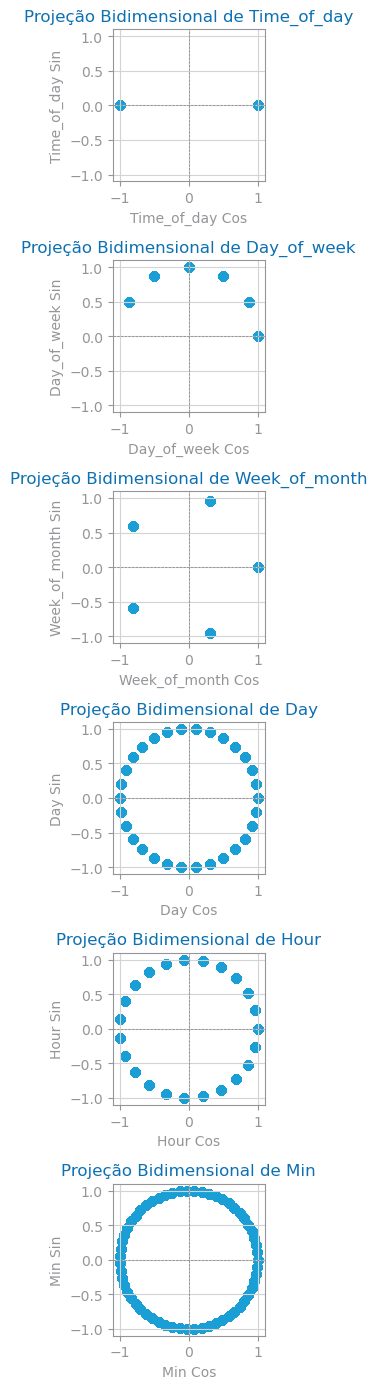

In [96]:
import matplotlib.pyplot as plt

# Lista de variáveis cíclicas
cyclical_vars = ['time_of_day', 'day_of_week', 'week_of_month', 'day', 'hour', 'min']

# Criar gráficos de dispersão para cada variável cíclica com tamanho maior
plt.figure(figsize=(14, 14))  # Aumentando o tamanho da figura

for i, var in enumerate(cyclical_vars):
    # Valores de seno e cosseno para a variável atual
    x_values = df[f'{var}_cos']
    y_values = df[f'{var}_sin']
    
    # Criar um subplot para cada variável
    plt.subplot(len(cyclical_vars), 1, i + 1)
    plt.scatter(x_values, y_values, alpha=0.6)
    plt.axhline(0, color='gray', lw=0.5, ls='--')
    plt.axvline(0, color='gray', lw=0.5, ls='--')
    
    # Ajustar os limites dos eixos para melhor visualização
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    # Adicionar título e rótulos
    plt.title(f'Projeção Bidimensional de {var.capitalize()}')
    plt.xlabel(f'{var.capitalize()} Cos')
    plt.ylabel(f'{var.capitalize()} Sin')
    
    # Mostrar a grade
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')  # Para garantir que o gráfico é circular

plt.tight_layout()  # Ajustar o layout
plt.show()  # Mostrar todos os gráficos


### Save final df from Data preparation - ENCODING into a csv file
- We will use this dataset for the missing alues

In [92]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_ecom_prep_encoding.csv'

# Salvar o DataFrame em CSV
df.to_csv(filepath, index=False)

In [93]:
df.head(20)

,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,is_weekend,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,week_of_month_sin,week_of_month_cos,day_sin,day_cos,hour_sin,hour_cos,min_sin,min_cos
0,0,NaN,26.26,5,underwear,NaN,0,0,0.0,1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,0.398,-0.917,0.159,-0.987
1,0,xiaomi,386.08,2,personal,massager,0,0,0.0,1.0,0.866,-0.500,-0.000,1.000,-0.000,1.000,0.998,-0.068,-0.991,-0.133
2,0,ariston,123.53,0,clocks,NaN,0,0,0.0,-1.0,0.500,-0.866,-0.588,-0.809,-0.407,-0.914,-0.942,-0.335,0.678,0.735
3,0,kawai,1437.53,5,underwear,NaN,0,0,0.0,1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,0.136,-0.991,-0.461,-0.887
4,0,defacto,17.99,5,shoes,keds,0,0,-0.0,1.0,0.866,0.500,-0.588,-0.809,-0.951,-0.309,0.888,0.460,0.461,-0.887
5,1,samsung,195.87,11,tools,light,0,0,0.0,1.0,0.866,-0.500,0.951,0.309,0.407,0.914,0.136,-0.991,-0.983,0.185
6,0,asus,385.57,0,audio,headphone,0,0,0.0,-1.0,0.866,-0.500,-0.951,0.309,-0.995,0.105,-0.631,-0.776,0.364,-0.931
7,0,galaxy,48.73,2,kitchen,oven,0,0,0.0,-1.0,0.866,-0.500,-0.588,-0.809,-0.208,-0.978,-0.398,-0.917,0.753,0.659
8,0,vivo,141.55,11,tools,light,0,0,0.0,-1.0,1.000,0.000,-0.588,-0.809,0.000,-1.000,-0.136,-0.991,0.941,-0.339
9,0,redmond,21.85,7,bicycle,NaN,0,0,0.0,1.0,0.866,0.500,-0.951,0.309,-0.407,0.914,0.817,-0.577,0.941,-0.339


## Missing Values